<a href="https://colab.research.google.com/github/ayeshagunarathne/Transformer_Neural_Networks/blob/main/Attention_mechanism_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial will explain the basic idea behind the self attention and cross attention used in the paper titled : ['Attention is all you need"](https://arxiv.org/abs/1706.03762)


Shown below is the transformer architecture of the original paper.

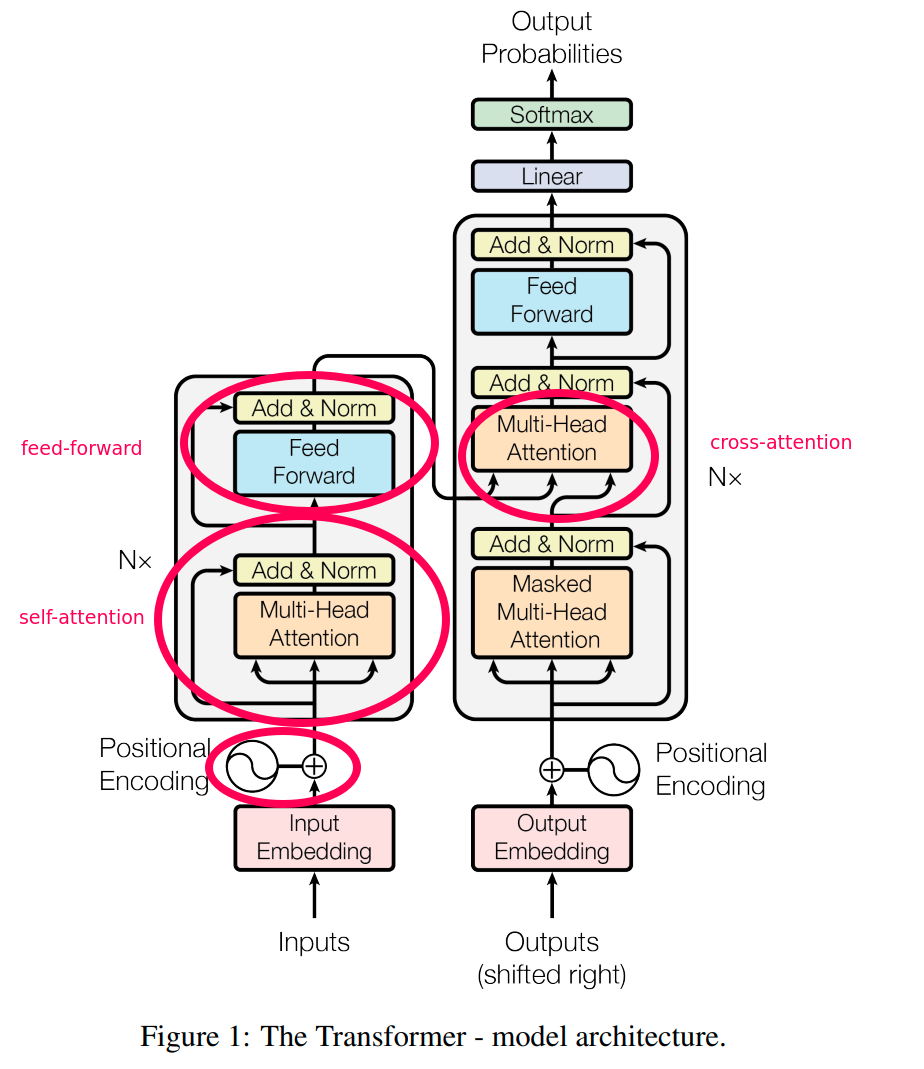

Image source: https://vaclavkosar.com/ml/transformers-self-attention-mechanism-simplified


First we'll look at why we need attention in a LLM model or any attention based NLP process?

## 1. **Why attention?**

Let's look at two sentences given below

1. I need to buy an apple and some oranges
2. I need to buy new apple phone.

In the sentences given above, the word apple is used under two contexts.But the computer or neural network that we use to process Natural languages doesn't know this.

What a model check is the vector related to the word 'apple' in the **embedding space**.So model will consider both these words 'apple' in the two sentences above to be of same meaning,which will result in an incorrect output.

**Attention mechanism** is used to understand the contexual meaning of a word by looking at the associating words and phrases.For example, in the sentences above,if we look at the word oranges,the model will understand that user is referring to apple fruit.Similarly in the second sentence if the model see the word 'phone',then it will understand that user is referring to a smart phone.


Apart from above main purpose,attention mechanism also provide some other benefits over other sequential models like RNNs/LSTM.



##2.  **Types of Attention mechanisms**

There are different attention mechanism types used right  now.Following references will help you to get a further idea about different Attention types.
1. [Medium.com blog post](https://medium.com/@zhonghong9998/attention-mechanisms-in-deep-learning-enhancing-model-performance-32a91006092a)
2. [Arize.com](https://arize.com/blog-course/attention-mechanisms-in-machine-learning/#:~:text=There%20are%20several%20common%20types,global%20attention%2C%20and%20local%20attention.)


This tutorail will focus only on **'self attention'** and **'cross attention'** used in the paper.



Let's start from self attention.




## 3. **What is self attention?**

The explanation given below(and the images) is quoted from a youtube video linked here:[Serrano.Academy](https://www.youtube.com/watch?v=OxCpWwDCDFQ&t=437s) (Check this channel for a very intuitive explanation about the attention mechanism)


Self attention can be explained in simple terms using a 2D embedding space.



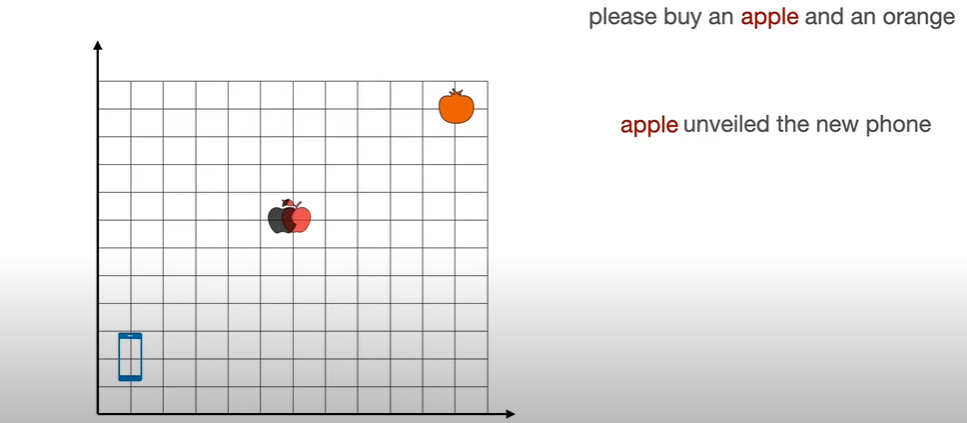








Image source: https://www.youtube.com/watch?v=OxCpWwDCDFQ&t=437s

Look at the image above.

let's assume that above 2D space represents a word embedding space.In this case the embedding vector is two dimensional and each word(related to images shown in the 2D space) will have  vectors as follows.

orange : [ 11,11] ,
phone : [1,2] ,
apple : [6,7]

Now look at the two sentences.

In the first sentence,the word 'apple' means the apple fruit and in the second sentence the word 'apple' means the smart phone brand.

So the neural network we are training,should update the vector for apple(which is [6,7] in this case) according to the input sequence or the input sentence.
This is done by checking the other words of the sequence.In the two sentences,the words 'orange' and 'smart phone' will aid in updating the vector.


For the 1st sentence, the vector should be moved closer to orange and for the 2nd sentence,the vector values should be closer to the phone.This scenario can be visualized using a figure as follows.

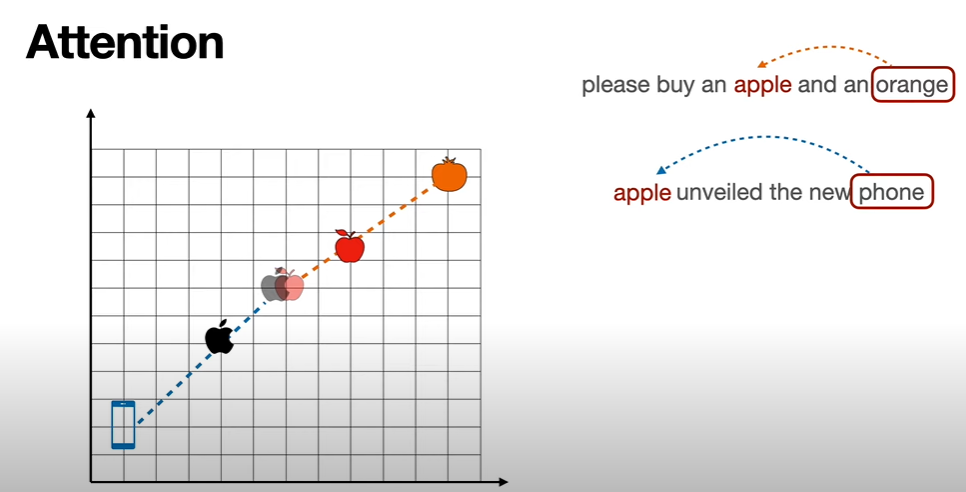

Image source: https://www.youtube.com/watch?v=OxCpWwDCDFQ&t=437s

Finally the new embedding vectors could have values like shown below.





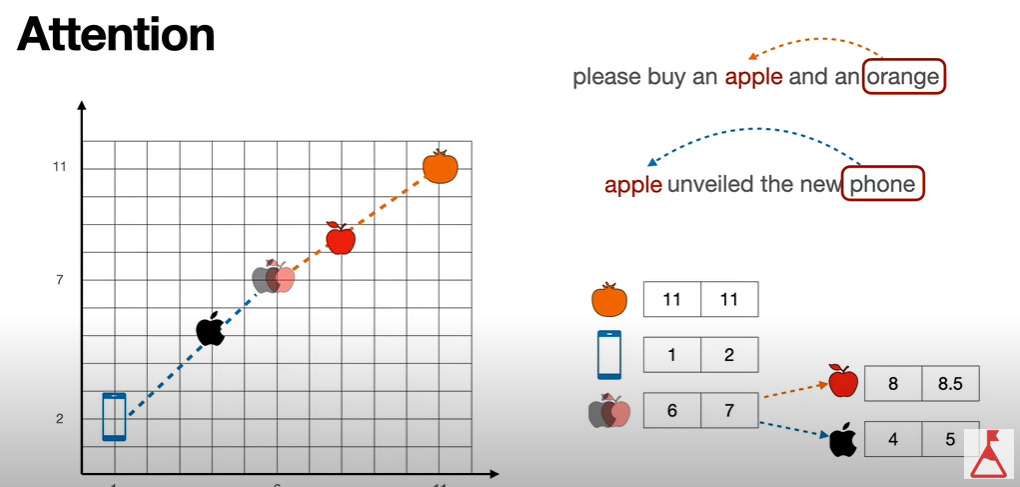

Image source: https://www.youtube.com/watch?v=OxCpWwDCDFQ&t=437s

The position of the word 'apple' in the embedding space gets updated based on the context of the input sequence.Humans can identify the relationship between apple & orange and apple & phone in the two sentences.But the neural networks cannot identify just by looking at a sequence.Models basically looks at how each of the word(or in standard form we call as 'tokens') attend into the other words(or tokens).Simply it has to look at the way each token is connected with others and a socre is calulated for their relationship.



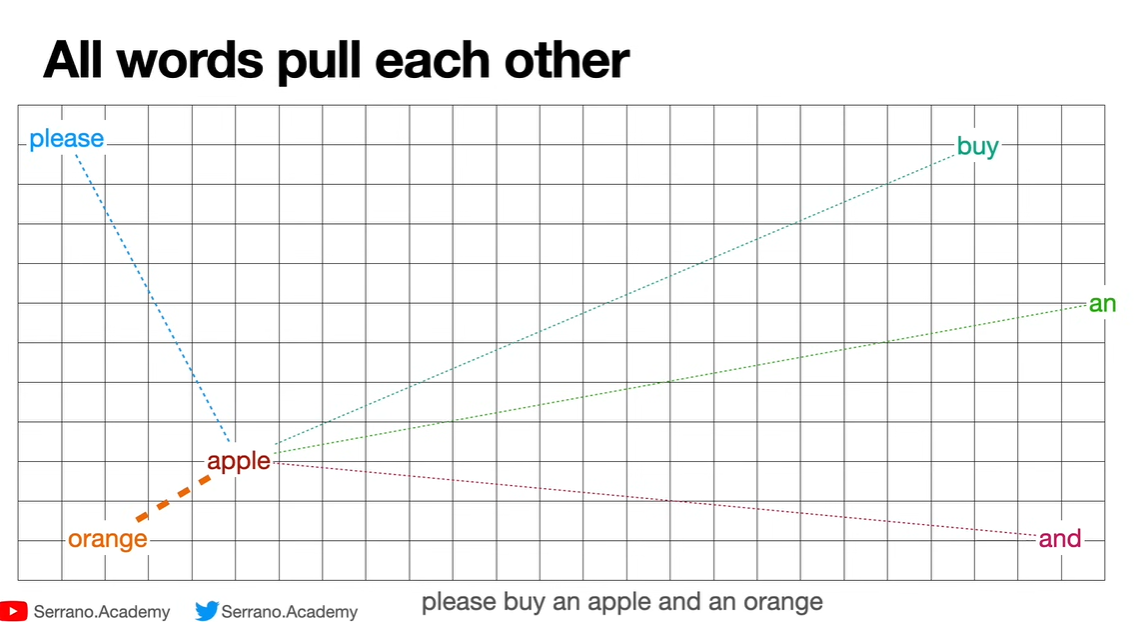


Image source: https://vaclavkosar.com/ml/transformers-self-attention-mechanism-simplified


The words that are similar in context gets pulled together.Above figure shows one such example.It shows how the words in the given sentence gets pulled based on the context of the sentence.


#### summary:

**A model looks at all the tokens of a sequence and compute a score based on how each token attend to others.**

**This is in brief the underlying intuition behind self attention**

##4. **Mathematics behind self attention**








Please refer to video in this link to understand the maths behind this mechanism in a more intuitive manner : https://www.youtube.com/watch?v=UPtG_38Oq8o

The first thing we need to understand when looking at the maths behind this concept is: We need a method to measure the similarity between the tokens of a sequence.We could do this using dot product and in the original paper,they use **'scaled dot product'** to find the similarity.

Shown below is the architecture of the self attention mechanism used in the original paper.

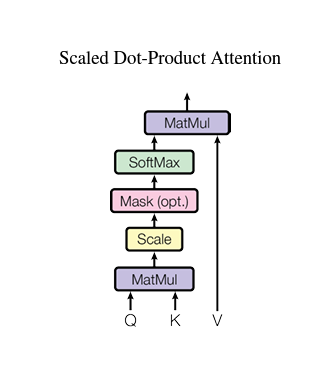





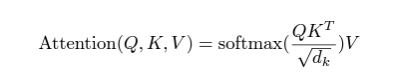

Shown above is the equation for the attention process.

The Q,K,V inputs shown above are matrices : Query,Key and Values

**As shown in the figure above,this mechanism computes the attention scores between queries(Q) and keys(k), and then uses these scores to weight the values(V)**

In simple terms Q,K and V are:

**Query : What we are looking for**

**Key: What we have with us or what we can offer**

**Value: What we actually give or output**


Mathematically,We can look at this process as follows:

If the input matrix that we give to attention block is X of size (Sequence Length x emebedding dimension) Then Q,K,V matrices will have same size of input.To obtain Q,K,V matrices,we multiply the input with weights Wq,Wk,Wv.

**Step 1: Obtaining the dot product of Q and K**
This will result in a matrix of size (sequence length x sequence lenght).This matrix will contain the attention scores for each pair of the input sequence

**Step 2 : The attention score is scaled using sqrt(dimensionality of key matrix)**
The reason for scaling is for numerical stability,to avoid large dot product values.

**Step 3 : Softmax function is applied to the resulting matrix to convert it to a probability distribution**

**Step 4: Multiply the output from step 3 with value matrix.The resulting output will be same size as the input matrix,which is (Sequence Length x emebedding dimension)**






















This entire process can be shown using a pseudo code as follows

**Output of attention mechanism = matmul(softmax(matmul(Q,transpose(K))),V)**

This dot product between Query and key can be visualized as a linear transformation as shown in the figures below.

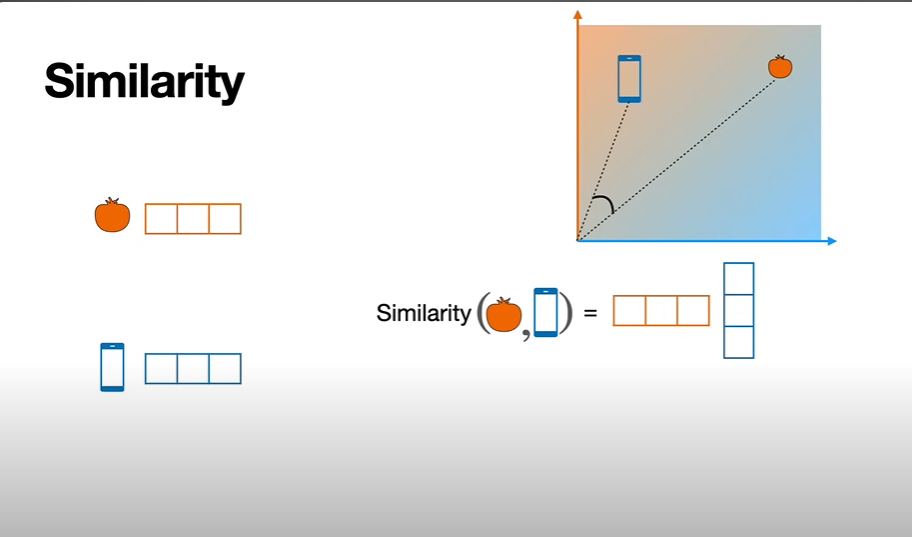

  Image source : https://www.youtube.com/watch?v=UPtG_38Oq8o

If we calculate the similarity between a pair of words ( in this case 'orange' and 'phone').then resluting value will give the distance between the two words in the embedding space.

Now look at the scenario given below.

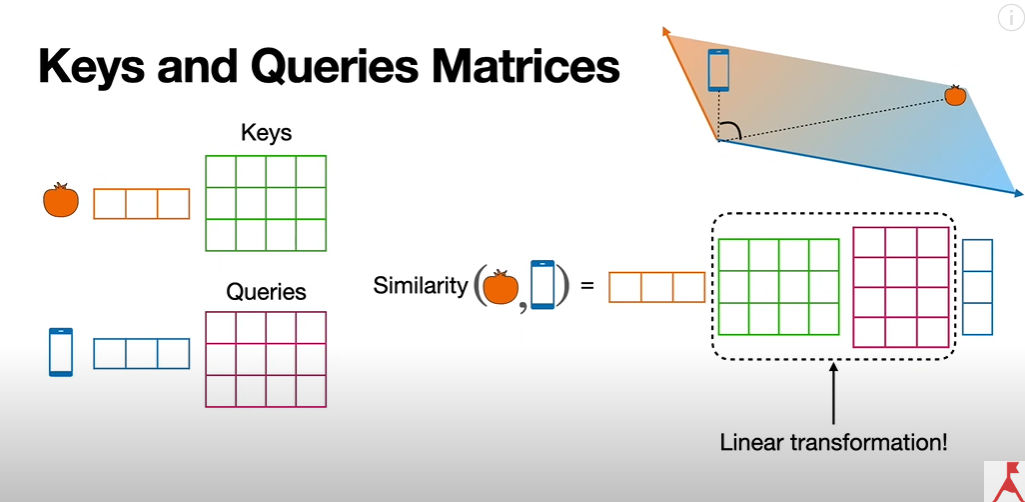


  Image source : https://www.youtube.com/watch?v=UPtG_38Oq8o
  
When we multiply the words with keys and queries matrices,then those matrices act as a linear transformation and the embedding space gets oriented into a much better representation which is suitable for understanding the context of the input.In brief that it is the scenario happening with Query and Key matrices.





The purpose of value matrix can be summarized using below figure

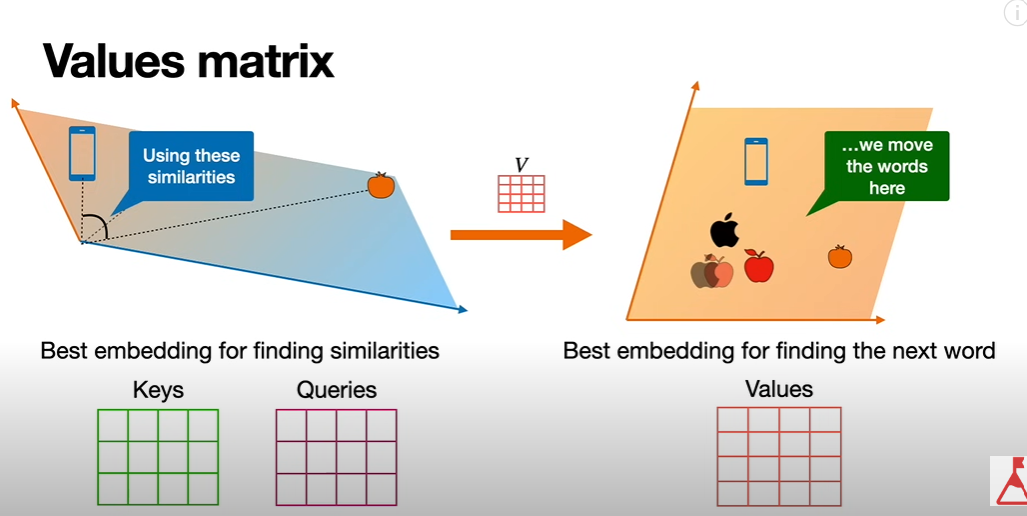


  Image source : https://www.youtube.com/watch?v=UPtG_38Oq8o

## What is multi-head attention ?

Explained above,is the mechanism of a single head of a self attention block.The orginal paper uses multi head attention in their work.

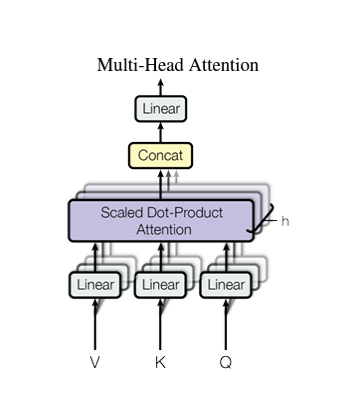


A multi head attention block consist of several attention blocks running
parallely.

 Instead of using a single set of query, key, and value vectors, multi-head attention contains multiple sets. Each head performs its own self-attention operation with different learned linear projections of the input.

 This allows the the model to capture different aspects or patterns from various subspaces of the input features.

 If the output of attentions heads are y1,y1...yi where i = total number of heads.All these outputs are concatenated to get the final output.

 Finally a linear transformation is applied to the concatenated output of all the attention heads.



